In [59]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [60]:
# Loading Data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
# Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
# Data description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## <b/> Feature Engineering

In [63]:
# converting sex into 0 & 1
def convert_sex(x):
    if x == 'male':
        return 1
    else:
        return 0
df['male'] = df['sex']
df['male'] = df['male'].map(convert_sex)

In [64]:
# converting smoker into 0 & 1
def convert_smoker(x):
    if x == 'yes':
        return 1
    else:
        return 0
df['smokers'] = df['smoker']
df['smokers'] = df['smokers'].map(convert_smoker)

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,smokers
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [66]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [67]:
def convert_region_sw(x):
    if x == 'southwest':
        return 1
    else:
        return 0
df['southwest'] = df['region']
df['southwest'] = df['southwest'].map(convert_region_sw)

def convert_region_se(x):
    if x == 'southeast':
        return 1
    else:
        return 0
df['southeast'] = df['region']
df['southeast'] = df['southeast'].map(convert_region_se)

def convert_region_nw(x):
    if x == 'northwest':
        return 1
    else:
        return 0
df['northwest'] = df['region']
df['northwest'] = df['northwest'].map(convert_region_nw)

def convert_region_ne(x):
    if x == 'northeast':
        return 1
    else:
        return 0
df['northeast'] = df['region']
df['northeast'] = df['northeast'].map(convert_region_ne)

df.head()

,age,sex,bmi,children,smoker,region,charges,male,smokers,southwest,southeast,northwest,northeast
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,0,1,0


## <b/> Exploratory Data Analysis

In [68]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#### <b/>Distribution of 'Sex' Parameter

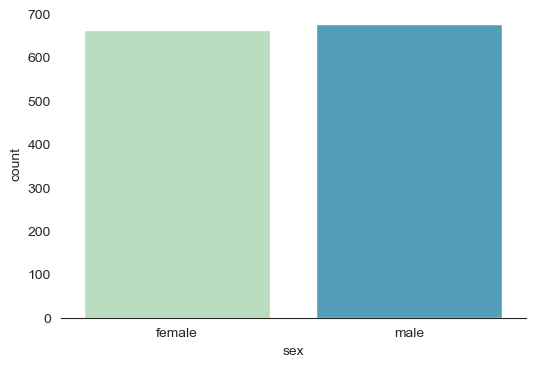

In [69]:
plt.figure(figsize=(6,4))
sns.set_style('white')
sns.countplot(data=df, x = 'sex', palette='GnBu')
sns.despine(left=True)

#### <b/> Relation of 'Smoking and Gender' wrt 'Charges'

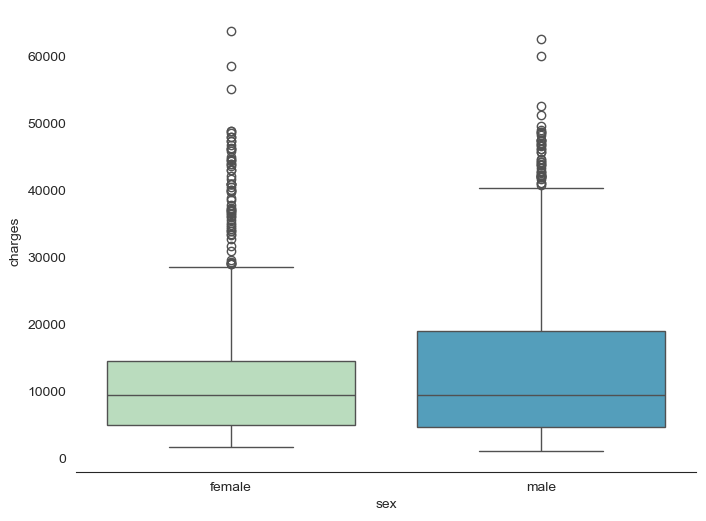

In [70]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.boxplot(data=df, x = 'sex',y='charges', palette='GnBu',)
sns.despine(left=True)

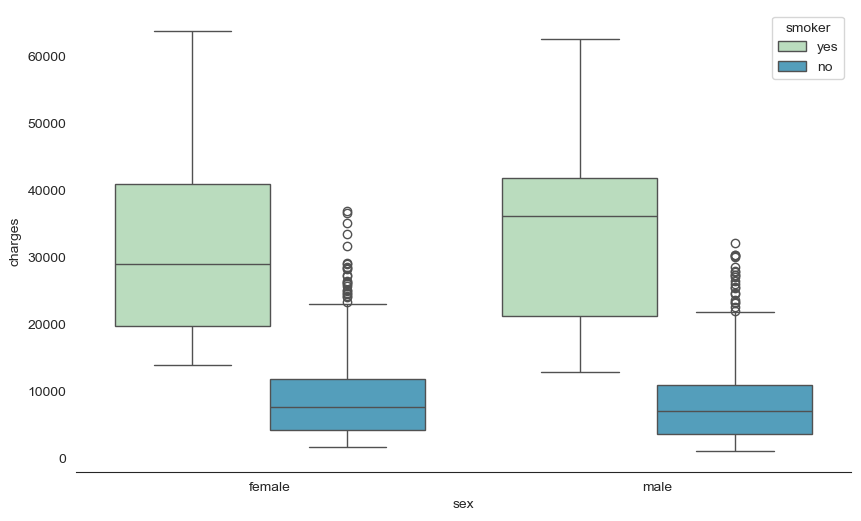

In [71]:
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.boxplot(data=df, x = 'sex',y='charges', hue='smoker', palette='GnBu',)
sns.despine(left=True)

#### <b/> Relation of 'Charges' wrt 'Age'

<Axes: xlabel='age', ylabel='charges'>

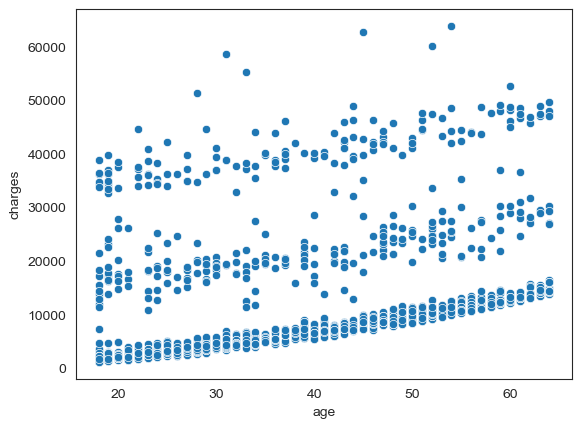

In [72]:
sns.scatterplot(x='age', y='charges', data=df)

<Axes: xlabel='age', ylabel='charges'>

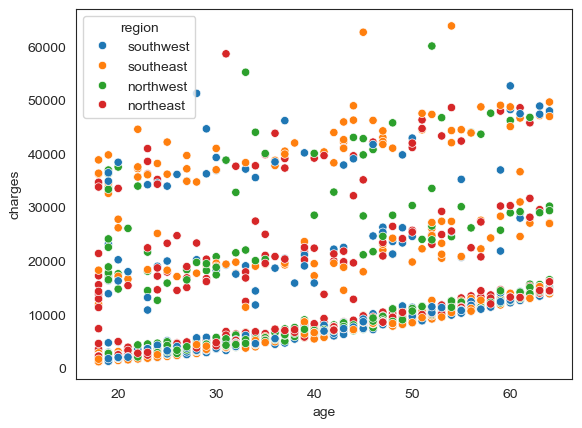

In [73]:
sns.scatterplot(x='age', y='charges', data=df, hue='region')

<Axes: xlabel='age', ylabel='charges'>

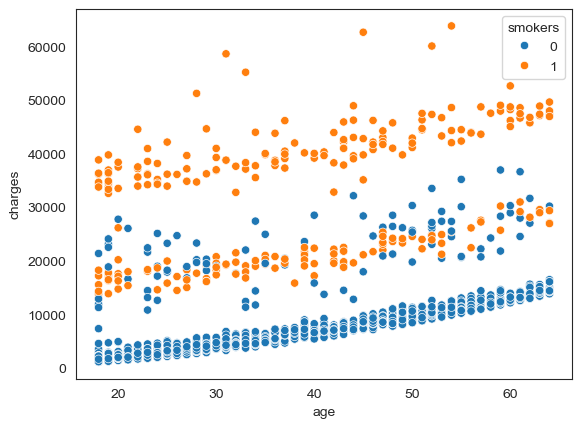

In [74]:
sns.scatterplot(x='age', y='charges', data=df, hue='smokers')

<Axes: xlabel='bmi', ylabel='charges'>

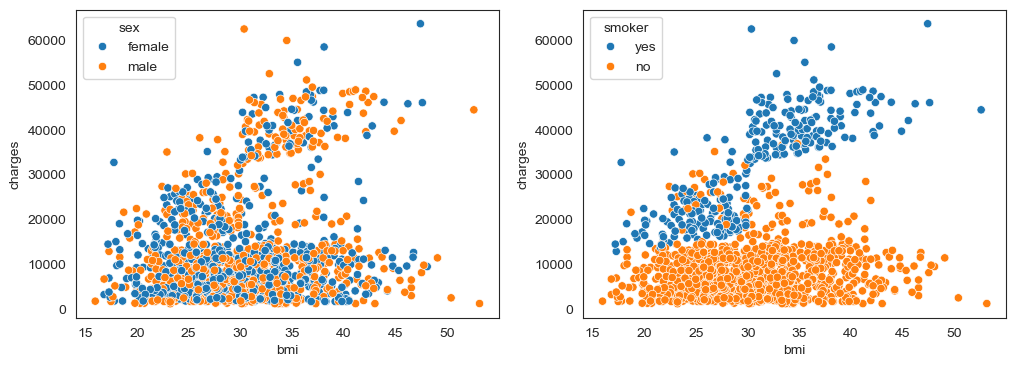

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.scatterplot(x='bmi', y='charges', data=df, hue='sex', ax = ax[0])
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', ax = ax[1])

In [76]:
# now we can drop some of the features which is not required
df.drop(['region', 'sex', 'smoker'], axis=1, inplace=True)

In [77]:
df.head()

,age,bmi,children,charges,male,smokers,southwest,southeast,northwest,northeast
0,19,27.900,0,16884.92400,0,1,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0


### <b/> Correlation 

In [78]:
corr = df.corr()
corr

,age,bmi,children,charges,male,smokers,southwest,southeast,northwest,northeast
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.010016,-0.011642,-0.000407,0.002475
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.006205,0.270025,-0.135996,-0.138156
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.021914,-0.023066,0.024806,-0.022808
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.043210,0.073982,-0.039905,0.006349
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.004184,0.017117,-0.011156,-0.002425
smokers,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945,0.002811
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,1.000000,-0.346265,-0.320829,-0.320177
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265,-0.345561
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320829,-0.346265,1.000000,-0.320177
northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,-0.320177,-0.345561,-0.320177,1.000000


<Axes: >

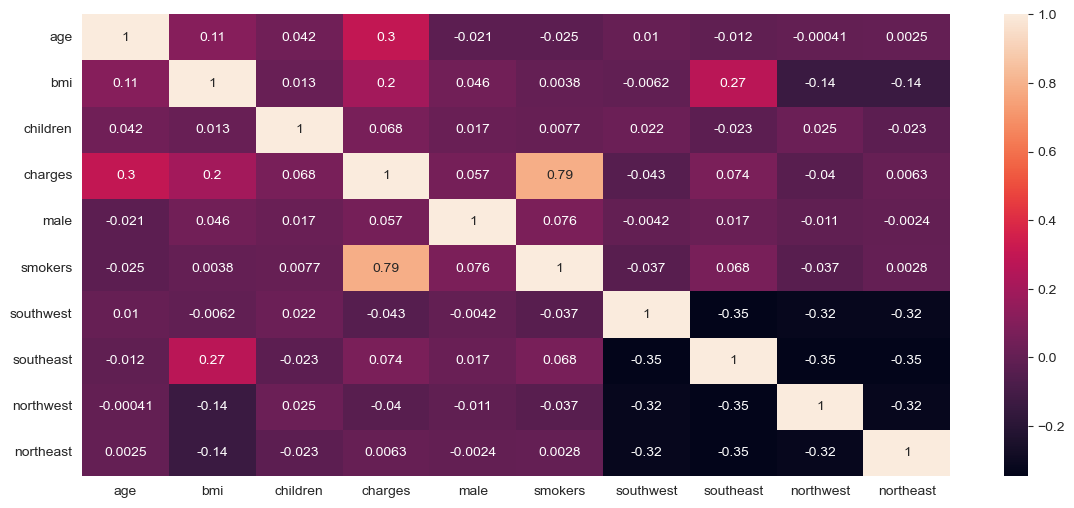

In [79]:
plt.figure(figsize=(14,6))
sns.heatmap(data=corr, annot=True)

## <b/> Splitting the Data

In [80]:
x = df.drop('charges', axis=1)
y = df['charges']

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

## <b/> Scaling the Data

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [91]:
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

# <b/><font color='green'>Support Vector Regression Model</font>

In [92]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scale_X_train, y_train)

SVR()

In [93]:
prediction = regressor.predict(scale_X_test)

In [94]:
prediction.shape

(536,)

In [95]:
y_test.shape

(536,)

In [96]:
prediction[:10]

array([9407.21174274, 9411.5663936 , 9394.23699817, 9361.26237675,
       9352.0454267 , 9421.37880855, 9354.1919371 , 9348.06708829,
       9392.80548287, 9375.58472391])

In [97]:
y_test[:10]

26      14451.83515
558     39983.42595
777      7448.40395
404      3260.19900
1336     2007.94500
883     46255.11250
672      4399.73100
168      2719.27975
473     20878.78443
100      6186.12700
Name: charges, dtype: float64

In [98]:
np.mean((y_test - prediction)**2)

165123070.82873735

Text(0.5, 0, 'Prediction')

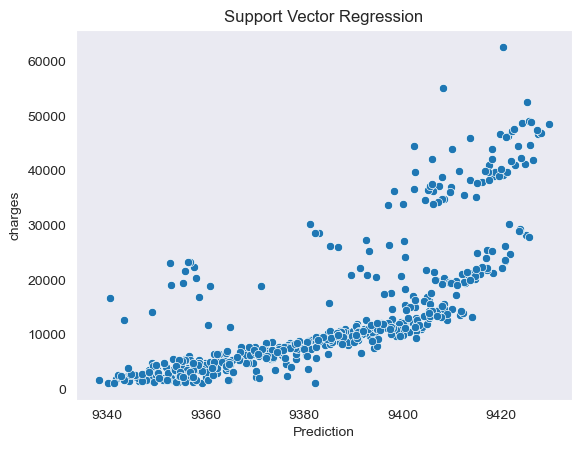

In [106]:
sns.set_style('dark')
f = sns.scatterplot(x=prediction,y=y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Prediction')